<a href="https://colab.research.google.com/github/kouluribabu12/fashion-mnist-using-tensorflow/blob/main/Fashion_MNIST_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.8.2


In [ ]:
# Our Dataset - Fashion MNIST (https://github.com/zalandoresearch/fashion-mnist)
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels, ),(test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

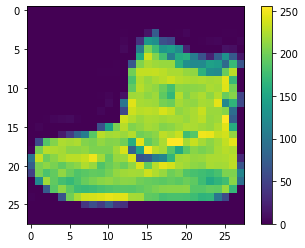

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

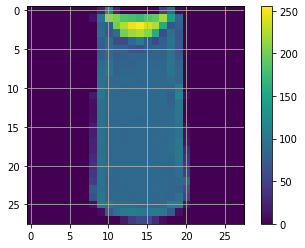

In [ ]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train_images,validate_images,train_labels,validat_labels = train_test_split(train_images,train_labels,test_size = 0.2,random_state = 12345)


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

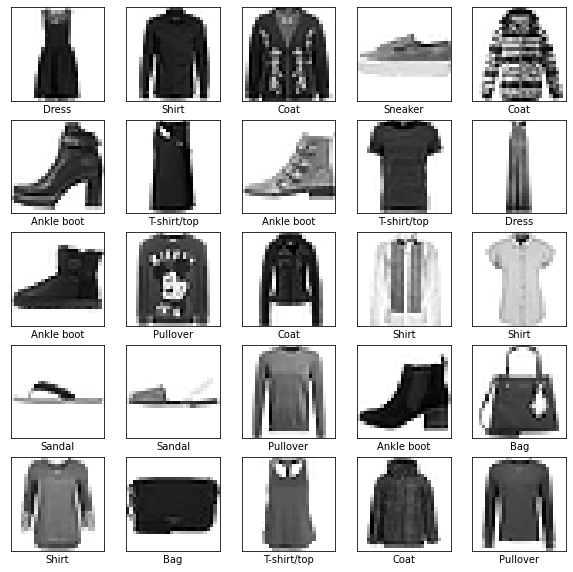

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

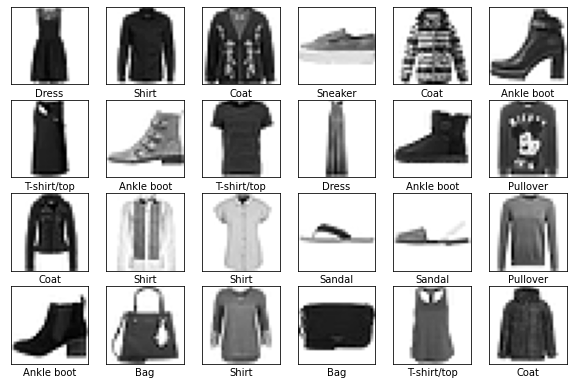

In [ ]:
plt.figure(figsize=(10,10))
for i in range(24):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#Fitting the Model
model.fit(train_images, train_labels, epochs=10)
#Evaluating Accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1500/1500 [==============================] - 5s 3ms/step - loss: 0.5166 - accuracy: 0.8189
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3884 - accuracy: 0.8590
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3500 - accuracy: 0.8730
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3233 - accuracy: 0.8812
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3047 - accuracy: 0.8875
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2884 - accuracy: 0.8937
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2783 - accuracy: 0.8967
Epoch 8/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2656 - accuracy: 0.9007
Epoch 9/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2557 - accuracy: 0.9029
Epoch 10/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2455 - accurac

In [ ]:
#Make Predictions
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

array([0.08557914, 0.08557913, 0.08557914, 0.08557913, 0.08557914,
       0.08564141, 0.08557913, 0.08722074, 0.08557913, 0.22808383],
      dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                             color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

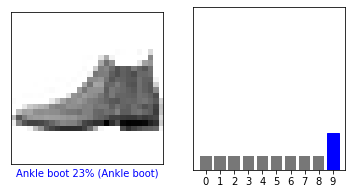

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

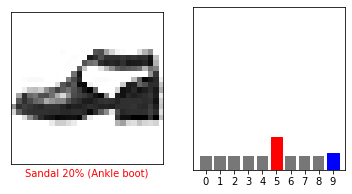

In [ ]:
i = 23
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

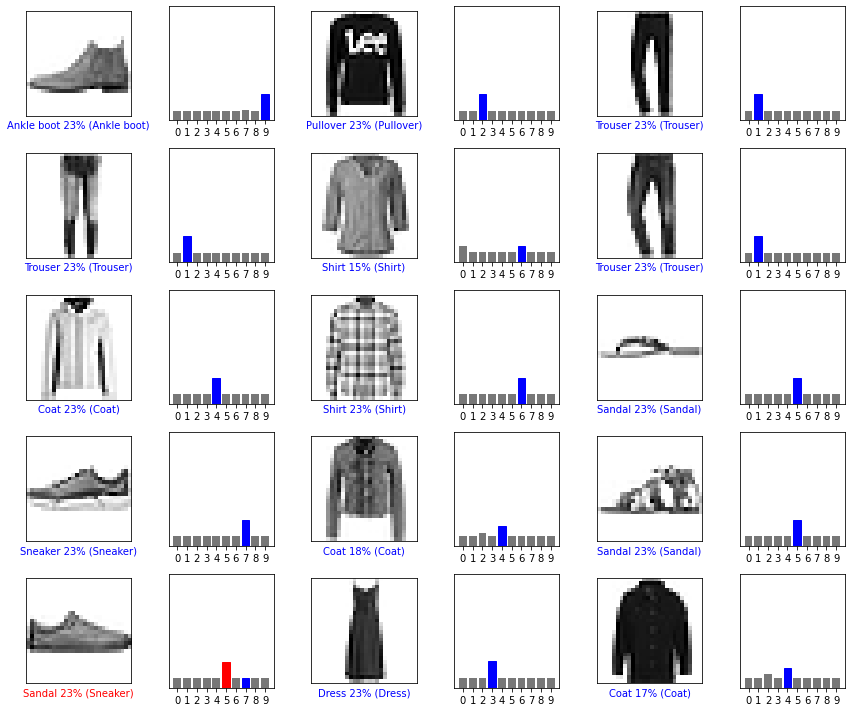

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

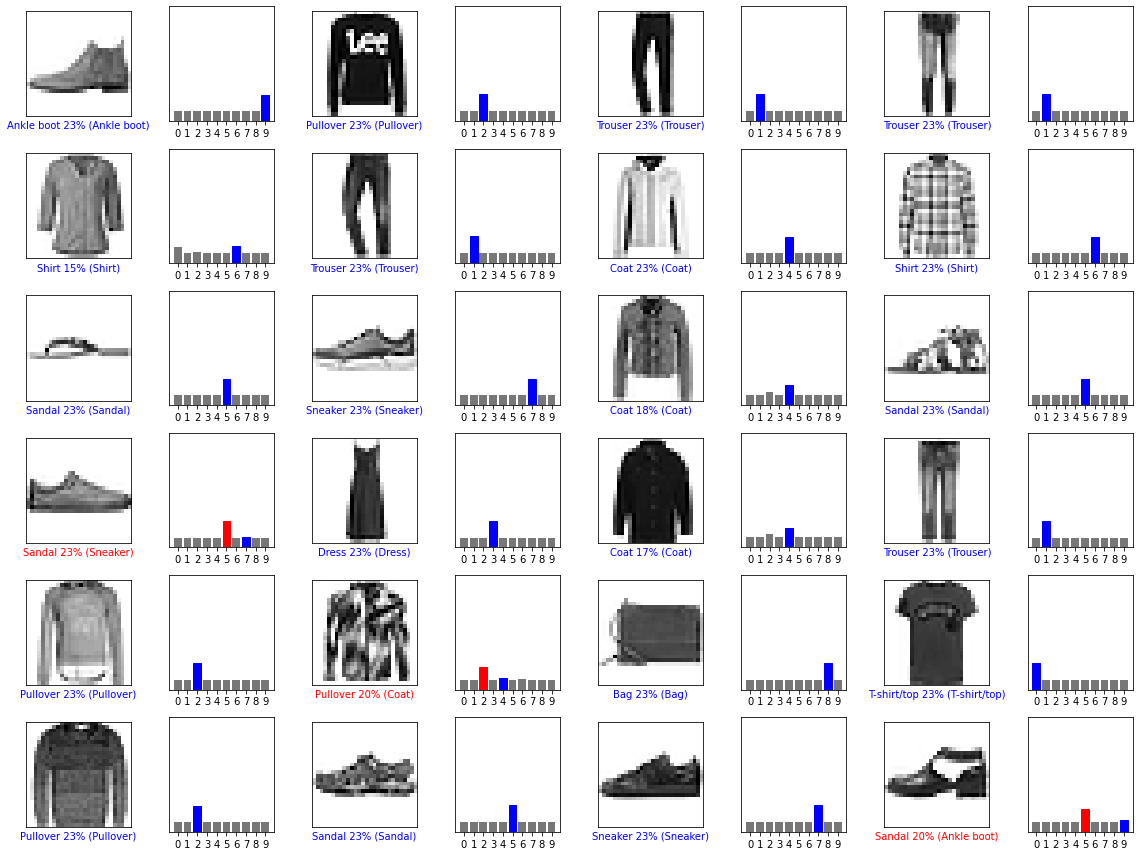

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[0.08534051 0.0853399  0.23191942 0.0853399  0.08535894 0.0853399
  0.08534174 0.0853399  0.0853399  0.0853399 ]]


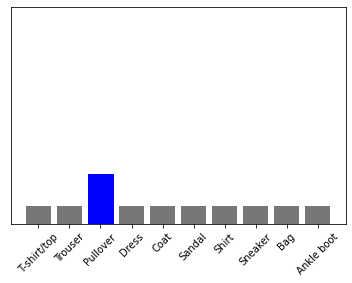

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

2

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics='accuracy')

In [ ]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 72s 48ms/step - loss: 0.4726 - accuracy: 0.8272
Epoch 2/10
1500/1500 [==============================] - 71s 48ms/step - loss: 0.3118 - accuracy: 0.8853
Epoch 3/10
1500/1500 [==============================] - 71s 48ms/step - loss: 0.2633 - accuracy: 0.9032
Epoch 4/10
1500/1500 [==============================] - 71s 47ms/step - loss: 0.2314 - accuracy: 0.9124
Epoch 5/10
1500/1500 [==============================] - 71s 47ms/step - loss: 0.2035 - accuracy: 0.9236
Epoch 6/10
1500/1500 [==============================] - 71s 47ms/step - loss: 0.1811 - accuracy: 0.9315
Epoch 7/10
1500/1500 [==============================] - 71s 47ms/step - loss: 0.1585 - accuracy: 0.9412
Epoch 8/10
1500/1500 [==============================] - 71s 47ms/step - loss: 0.1408 - accuracy: 0.9469
Epoch 9/10
1500/1500 [==============================] - 70s 47ms/step - loss: 0.1257 - accuracy: 0.9535
Epoch 10/10
1486/1500 [============================>.] - ETA: 0s

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

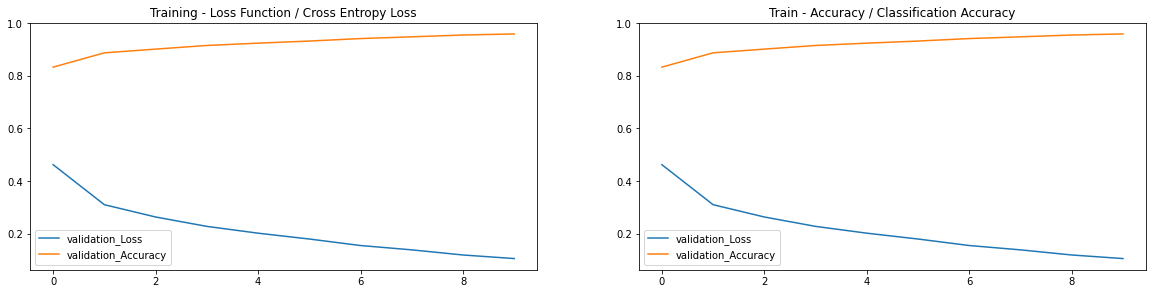

In [ ]:
#history.history
loss = history.history['loss']
acc = history.history['accuracy']

epochs_range = range(10)
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.plot(epochs_range, loss, label='validation_Loss')
plt.plot(epochs_range, acc, label='validation_Accuracy')
plt.legend()
plt.title('Training - Loss Function / Cross Entropy Loss')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='validation_Loss')
plt.plot(epochs_range, acc, label='validation_Accuracy')
plt.legend()
plt.title('Train - Accuracy / Classification Accuracy')
plt.show()


In [ ]:
score = model.evaluate(test_images,test_labels,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))


Test Loss : 2.3069
Test Accuracy : 0.1098
